# Sparse Distributed Memory Experiments

This notebook explores Sparse Distributed Memory (SDM) through various experimental implementations. Core functionality is provided by the `KanervaSDM` module, developed from Pentti Kanerva's 1992 work *Sparse Distributed Memory and Related Models*. The `KanervaSDM` module operates on binary address and memory vectors, and provides a minimalist foundation for more sophisticated implementations.

© 2025 Simon Wong

In [1]:
from KanervaSDM import KanervaSDM
import numpy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm

## Basic writing and reading

### Storing and recalling a single memory

In this example: 
- Address and memory dimensions are the same. 

In [ ]:
SDM = KanervaSDM(
    address_dimension = 100, 
    memory_dimension = 100, 
    num_locations = 100**2,  # Heuristic from Kanerva's work. 
    activation_threshold = 100/2 - (100/2)**0.5  # Heuristic from Kanerva's work.   
)

address = np.random.randint(0, 2, SDM.memory_dimension, dtype=np.int8)
memory = np.random.randint(0, 2, SDM.memory_dimension, dtype=np.int8)

SDM.write(address, memory)

recalled_memory = SDM.read(address)

error = np.sum(memory != recalled_memory) / SDM.memory_dimension * 100

print(f"Original memory: \n{memory}")

print(f"Recalled memory: \n{recalled_memory}")

print(f"Recall error: {error:.2f}%.")

Original memory: 
[0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0
 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1
 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0]
Recalled memory: 
[0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 0
 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 1
 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0]
Recall error: 0.00%.


### Storing and recalling multiple memories, 

In this example: 
- Address and memory dimensions are the same. 
- Address and memory vectors are __not__ equal. 
- Memories are read and error is calculated after all memories have been written. 

In [ ]:
SDM = KanervaSDM(
    address_dimension = 100, 
    memory_dimension = 100, 
    num_locations = 100**2,  # Heuristic from Kanerva's work. 
    activation_threshold = 100/2 - (100/2)**0.5  # Heuristic from Kanerva's work.   
)

num_memories = 100

addresses = np.empty((num_memories, SDM.address_dimension))
memories = np.empty((num_memories, SDM.memory_dimension))
recalled_memories = np.empty((num_memories, SDM.memory_dimension))
errors = np.empty(num_memories)

for i in range(num_memories): 
    address = np.random.randint(0, 2, SDM.address_dimension, dtype=np.int8)
    memory = np.random.randint(0, 2, SDM.memory_dimension, dtype=np.int8)

    addresses[i] = address
    memories[i] = memory

    SDM.write(address, memory)

    recalled_memory = SDM.read(address)

    error = np.sum(memory != recalled_memory) / SDM.memory_dimension * 100

for i in range(num_memories): 
    address = addresses[i]
    recalled_memory = SDM.read(address)
    recalled_memories[i] = recalled_memory

for i in range(num_memories):
    errors[i] = np.sum(memories[i] != recalled_memories[i])
mean_error = np.mean(errors) / SDM.memory_dimension * 100
max_error = np.max(errors) / SDM.memory_dimension *100
max_error_idx = np.argmax(errors)

print(f"\nMean recall error: {mean_error:.2f}%.")
print(f"\nMax recall error: {max_error:.2f}% (memory #{max_error_idx+1}).")



Mean recall error: 8.58%.

Max recall error: 18.00% (memory #21).


### Storing and recalling memories. 

In this example: 
- Address and memory dimensions are the same. 
- Address and memory vectors are __not__ equal. 
- Memories are read and error is calculated after each new memory is written. 

This cell may take around 10 seconds to run. 

100%|██████████| 100/100 [00:04<00:00, 22.50it/s]



Final mean recall error: 5.70%

Final max recall error: 14.00%


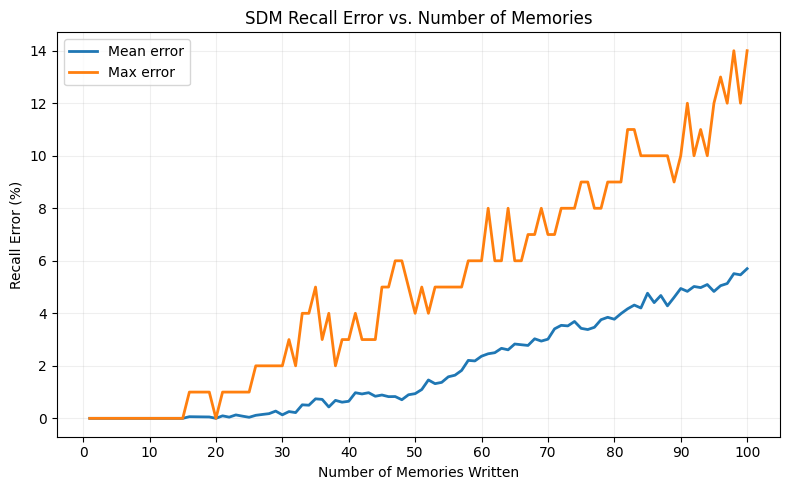

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

SDM = KanervaSDM(
    address_dimension = 100, 
    memory_dimension = 100, 
    num_locations = 100**2,  # Heuristic from Kanerva's work. 
    activation_threshold = 100/2 - (100/2)**0.5  # Heuristic from Kanerva's work. 
)

num_memories = 100

addresses = []
memories = []
mean_errors = []
max_errors = []

for i in tqdm(range(num_memories)): 
    # Generate and store new memory. 
    address = np.random.randint(0, 2, SDM.address_dimension, dtype=np.int8)
    memory = np.random.randint(0, 2, SDM.memory_dimension, dtype=np.int8)
    
    addresses.append(address)
    memories.append(memory)
    
    SDM.write(address, memory)
    
    # Check recall error for all memories written so far. 
    errors = []
    for j in range(i + 1):
        recalled_memory = SDM.read(addresses[j])
        error = np.sum(memories[j] != recalled_memory)
        errors.append(error)
    
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    mean_errors.append(mean_error)
    max_error = np.max(errors) / SDM.memory_dimension * 100
    max_errors.append(max_error)

print(f"\nFinal mean recall error: {mean_errors[-1]:.2f}%")
print(f"\nFinal max recall error: {max_errors[-1]:.2f}%")

# Plot results. 
plt.figure(figsize=(8, 5))
plt.plot(range(1, num_memories + 1), mean_errors, linewidth=2, label="Mean error")
plt.plot(range(1, num_memories + 1), max_errors, linewidth=2, label="Max error")
plt.xlabel("Number of Memories Written")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Number of Memories")
plt.xticks(range(0, num_memories + 1, 10))  # Every 10th integer. 
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

### Varying address and memory dimensions when they are the same

In this example: 
- Address and memory dimensions are the same, and are incremented from 10 to 500. 
- The number of stored memories is the dimension value. 

This cell may take around sixty seconds to run. 


Dimension = 10


100%|██████████| 10/10 [00:00<?, ?it/s]



Dimension = 25


100%|██████████| 25/25 [00:00<?, ?it/s]



Dimension = 50


100%|██████████| 50/50 [00:00<00:00, 2934.02it/s]



Dimension = 100


100%|██████████| 100/100 [00:00<00:00, 750.97it/s]



Dimension = 250


100%|██████████| 100/100 [00:02<00:00, 48.03it/s]



Dimension = 500


100%|██████████| 100/100 [00:16<00:00,  6.19it/s]


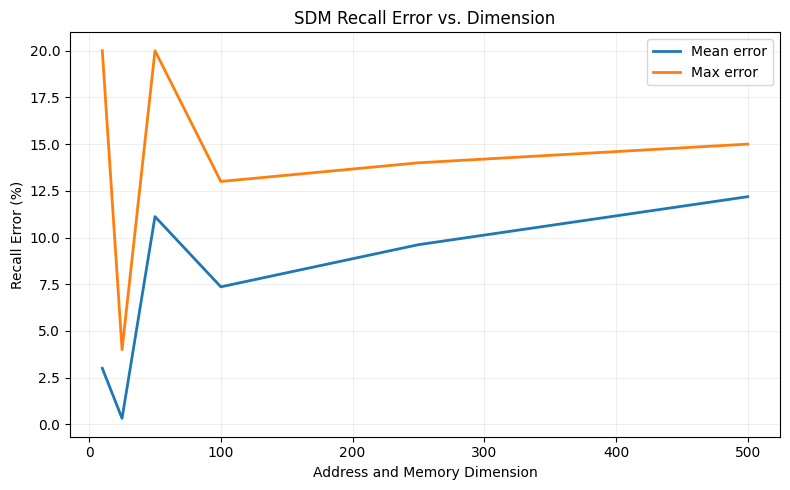

In [ ]:
dimensions = [10, 25, 50, 100, 250, 500]
mean_errors = []
max_errors = []

for i, dim in enumerate(dimensions): 

    print(f"\nDimension = {dim}")

    SDM = KanervaSDM(
        address_dimension = dim, 
        memory_dimension = dim, 
        num_locations = dim**2, # Heuristic from Kanerva's work. 
        activation_threshold = dim/2 - (dim/2)**0.5  # Heuristic from Kanerva's work.   
    )

    num_memories = min(dim, 100)

    addresses = np.empty((num_memories, SDM.address_dimension))
    memories = np.empty((num_memories, SDM.memory_dimension))
    recalled_memories = np.empty((num_memories, SDM.memory_dimension))
    errors = np.empty(num_memories)

    for i in tqdm(range(num_memories)): 
        address = np.random.randint(0, 2, SDM.address_dimension, dtype=np.int8)
        memory = np.random.randint(0, 2, SDM.memory_dimension, dtype=np.int8)

        addresses[i] = address
        memories[i] = memory

        SDM.write(address, memory)

        recalled_memory = SDM.read(address)

        error = np.sum(memory != recalled_memory) / SDM.memory_dimension * 100

    for i in tqdm(range(num_memories)): 
        address = addresses[i]
        recalled_memory = SDM.read(address)
        recalled_memories[i] = recalled_memory

    for i in range(num_memories):
        errors[i] = np.sum(memories[i] != recalled_memories[i])
    mean_error = np.mean(errors) / SDM.memory_dimension * 100
    max_error = np.max(errors) / SDM.memory_dimension *100
    max_error_idx = np.argmax(errors)

    mean_errors.append(mean_error)
    max_errors.append(max_error)

plt.figure(figsize=(8, 5))
plt.plot(dimensions, mean_errors, linewidth=2, label="Mean error")
plt.plot(dimensions, max_errors, linewidth=2, label="Max error")
plt.xlabel("Address and Memory Dimension")
plt.ylabel("Recall Error (%)")
plt.title("SDM Recall Error vs. Dimension")
plt.legend()
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()
